# Phase 2: Data Summarization and Preprocessing


### - Sample 20 rows from the dataset


In [42]:
import pandas as pd
import numpy as np

df = pd.read_csv('Dataset/Dataset_HR_Employee-Attrition.csv')

sample_data = df.sample(n=20)
print("Sample of 20 rows from the dataset:")
print(sample_data)

Sample of 20 rows from the dataset:
      Age Attrition     BusinessTravel  DailyRate              Department  \
1009   58        No      Travel_Rarely       1055  Research & Development   
775    43        No      Travel_Rarely        415                   Sales   
730    30        No      Travel_Rarely        153  Research & Development   
620    35        No      Travel_Rarely       1343  Research & Development   
853    19        No      Travel_Rarely        645  Research & Development   
1452   50       Yes  Travel_Frequently        878                   Sales   
821    49        No      Travel_Rarely        174                   Sales   
944    28        No         Non-Travel       1476  Research & Development   
688    19       Yes      Travel_Rarely        419                   Sales   
840    35        No      Travel_Rarely        982  Research & Development   
1001   37        No      Travel_Rarely       1462  Research & Development   
1143   45        No         Non-Travel  

By displaying 20 randomly sampled rows from the dataset, we were able to inspect the data and check the variety in terms of employee attributes. This sampling helps in providing a clear picture of what our dataset looks like and ensures the data seems reasonable before deeper analysis.We chose not to rely solely on sampling for the rest of the analysis because sampling may not provide a full representation of the dataset.

### - Show the missing value:

In [43]:
missing_values = df.isnull().sum()
print("\nMissing Values in each column:")
print(missing_values)


Missing Values in each column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInC

The output of the isnull().sum() function indicates that there are no missing values in any of the columns. This is a good sign since we don't need to perform any imputation, simplifying our preprocessing pipeline.

### - Show the duplicates value:

First, we count the number of duplicates rows, and then we remove them:

In [44]:
num_duplicates = data.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


This code checks for and removes duplicate rows if we need it from the dataset, confirming that there are 0 duplicate rows, ensuring data integrity for analysis.

### - Show the Min., 1st Qu., Median, Mean ,3rd Qu.,Max. for each numeric column:

Using the `describe()` function, we can observe key statistics for each numeric column in the dataset:
1. **Age**: The age of employees ranges from 18 to 60 years, with a mean age of approximately 36.92. This indicates a relatively young workforce with a standard deviation of about 9.14 years.
   
2. **DailyRate**: The daily rates vary significantly from 102 to 1499, with a mean of 802.49, suggesting substantial differences in pay among employees.

3. **DistanceFromHome**: Employees live an average of 9.19 units away from the workplace, with distances ranging from 1 to 29.

4. **Education**: The education level has a mean of 2.91, indicating that most employees have completed a degree, with levels ranging from 1 to 5.

5. **EmployeeCount**: The EmployeeCount is constant at 1 for all entries, suggesting no variability in this feature, making it non-informative for analysis.

6. **EmployeeNumber**: Employee numbers range from 1 to 2068, with a mean of 1024.87.

7. **EnvironmentSatisfaction**: Employees report a mean satisfaction level of 2.72, with values ranging from 1 to 4.

8. **HourlyRate**: The hourly rate ranges from 30 to 100, with a mean of 65.89.

9. **JobInvolvement**: Job involvement has a mean of 2.73, suggesting moderate involvement among employees.

10. **JobLevel**: The average job level is about 2.06, indicating a mix of job positions.

11. **JobSatisfaction**: Employees report an average job satisfaction score of 2.71.

12. **MaritalStatus**: The marital status of employees has a consistent mean, reflecting their demographics.

13. **MonthlyIncome**: The monthly income varies widely, with a mean of 6505.67.

14. **TotalWorkingYears**: Employees have a mean of 11.28 years of total working experience, with a maximum of 40 years.

15. **WorkLifeBalance**: The average score for work-life balance is 2.76, indicating a reasonable balance.

16. **YearsAtCompany**: The average tenure at the company is 7.01 years, suggesting some employees are long-term.

17. **YearsInCurrentRole**: The average is 4.23 years, indicating stability in roles.

18. **YearsSinceLastPromotion**: Employees have a mean of 2.19 years since their last promotion, suggesting opportunities for growth.

19. **YearsWithCurrManager**: The average time with the current manager is 4.12 years, indicating relatively stable managerial relationships.

In [45]:
summary_stats=df.describe();
print(summary_stats);

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

This summary provides a comprehensive overview of the employee demographics and various attributes within the dataset, allowing for better insights into employee behavior and potential areas for improvement.

### - Show the Variance:

Variance helps understand the extent of dispersion or scatter of values in each column. As the variance increases, it indicates that the values are more spread out and scattered away from the mean, whereas decreasing variance suggests that the values are less scattered and closer to the mean value. Therefore, our variance results indicate:

- **Age** has a relatively high variance (83.45), suggesting that there is significant variability in the ages of employees.
- **DailyRate** shows the highest variance (162,819.6), indicating a wide range of daily salaries among employees.
- **DistanceFromHome** has a moderate variance (65.72), suggesting that employees live at varying distances from the workplace.
- **Education** and **EnvironmentSatisfaction** have low variances (1.05 and 1.19, respectively), indicating that most employees fall into a similar educational background and have comparable levels of satisfaction with their environment.
- **EmployeeCount** and **StandardHours** have a variance of 0, indicating that these values are constant across all records.
- **JobInvolvement**, **JobLevel**, and **JobSatisfaction** also have relatively low variances (0.51, 1.23, and 1.22, respectively), suggesting consistency in job involvement and satisfaction among employees.
- **MonthlyIncome** has a very high variance (22,164,860), indicating that there are substantial differences in salaries among employees.
- **MonthlyRate** exhibits the highest variance (50,662,880), suggesting extreme variability in the monthly rate employees receive.
- **TotalWorkingYears** and **YearsAtCompany** show moderate variances (60.54 and 37.53), indicating a range of experiences among employees.


In [46]:
variance= df.var(numeric_only=True);
print(variance);

Age                         8.345505e+01
DailyRate                   1.628196e+05
DistanceFromHome            6.572125e+01
Education                   1.048914e+00
EmployeeCount               0.000000e+00
EmployeeNumber              3.624333e+05
EnvironmentSatisfaction     1.194829e+00
HourlyRate                  4.132856e+02
JobInvolvement              5.063193e-01
JobLevel                    1.225316e+00
JobSatisfaction             1.216270e+00
MonthlyIncome               2.216486e+07
MonthlyRate                 5.066288e+07
NumCompaniesWorked          6.240049e+00
PercentSalaryHike           1.339514e+01
PerformanceRating           1.301936e-01
RelationshipSatisfaction    1.169013e+00
StandardHours               0.000000e+00
StockOptionLevel            7.260346e-01
TotalWorkingYears           6.054056e+01
TrainingTimesLastYear       1.662219e+00
WorkLifeBalance             4.991081e-01
YearsAtCompany              3.753431e+01
YearsInCurrentRole          1.312712e+01
YearsSinceLastPr

Overall, these variance results highlight which employee attributes exhibit significant variability, which can be valuable for identifying trends and understanding the workforce dynamics within the organization.

# - Understanding the data through graph representations:

#### 1. Pie Chart

This visualization will provide a clear representation of the proportions of employees who have stayed versus those who have left the company.

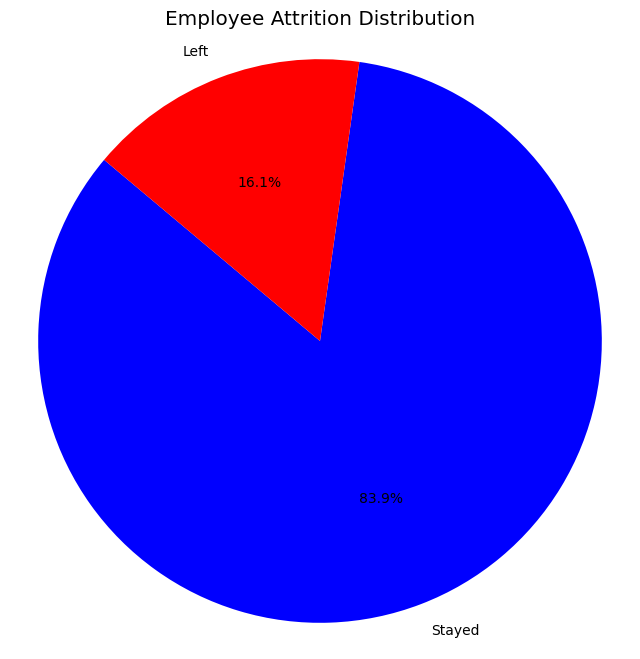

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('Dataset/Dataset_HR_Employee-Attrition.csv')
attrition_counts = df['Attrition'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(attrition_counts, labels=['Stayed', 'Left'], autopct='%1.1f%%', startangle=140, colors=['blue', 'red'])
plt.title('Employee Attrition Distribution')
plt.axis('equal')  
plt.show()


- Why Chosen: Pie charts provide a visual representation of proportions, making it easy to see the ratio of employees who have stayed versus those who have left the company.

- Explanation: The pie chart illustrates the distribution of employee attrition, clearly showing the percentage of employees who have stayed compared to those who have left. This visualization helps to quickly assess the overall attrition rate and can highlight potential areas of concern regarding employee retention within the organization.

#### 2. Histogram for Numerical Variables

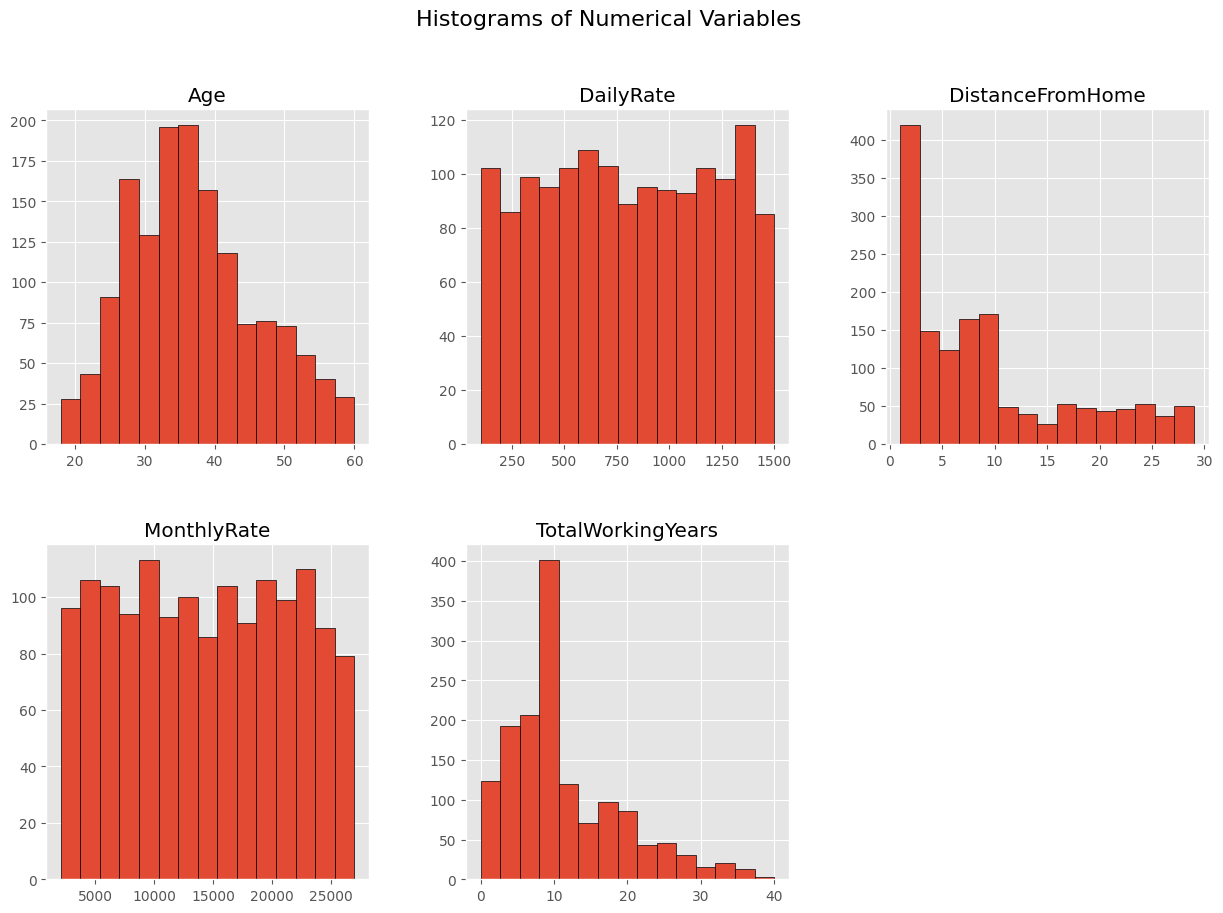

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Dataset/Dataset_HR_Employee-Attrition.csv')

plt.style.use('ggplot')

numerical_vars = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyRate', 'TotalWorkingYears']
df[numerical_vars].hist(bins=15, figsize=(15, 10), layout=(2, 3), edgecolor='black')
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.show()

- Why Chosen: Histograms provide a visual representation of the distribution of continuous data. This helps to identify the shape of the data distribution (normal, skewed, etc.), detect any potential outliers, and understand the variability in each numerical variable.

- Explanation: Each histogram gives insight into how values in a particular numerical feature are spread. For example, the age distribution may show whether the company has more young or older employees. This is essential to understand the range, frequency, and central tendency of these features, which can impact attrition analysis.


#### 3. Scatter plot 

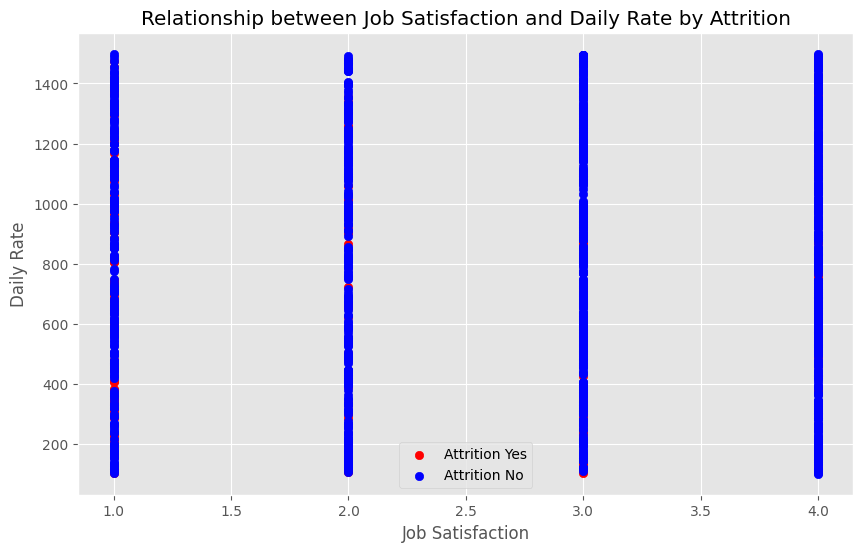

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(df[df['Attrition'] == 'Yes']['JobSatisfaction'], df[df['Attrition'] == 'Yes']['DailyRate'], color='red', label='Attrition Yes')
plt.scatter(df[df['Attrition'] == 'No']['JobSatisfaction'], df[df['Attrition'] == 'No']['DailyRate'], color='blue', label='Attrition No')
plt.xlabel('Job Satisfaction')
plt.ylabel('Daily Rate')
plt.title('Relationship between Job Satisfaction and Daily Rate by Attrition')
plt.legend()
plt.grid(True)
plt.show()


- Why Chosen:
Scatter plots provide a clear way to visualize the relationship between two variables. They help to identify trends, correlations, or lack thereof, as well as detect potential clusters or outliers within the data. This is useful in understanding how different variables interact with each other, particularly in examining employee behaviors or trends in the dataset.

- Explanation:
This scatter plot explores how Total Working Years and Monthly Income are connected. It helps to see whether employees with more experience tend to earn higher incomes, which can be an important factor in workforce planning and retention strategies. By looking at the distribution of data points, you can determine if the relationship is linear or if there are other patterns such as outliers or varying levels of income regardless of experience.

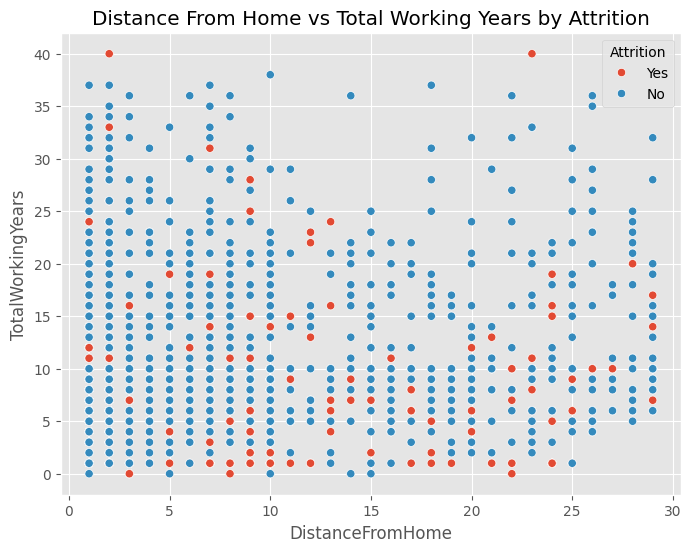

In [50]:
plt.figure(figsize=(8, 6)) 
sns.scatterplot(x=df['DistanceFromHome'], y=df['TotalWorkingYears'], hue=df['Attrition']) 
plt.title('Distance From Home vs Total Working Years by Attrition') 
plt.xlabel('DistanceFromHome') 
plt.ylabel('TotalWorkingYears') 
plt.show()

- Why Chosen: A scatter plot was selected to visualize the relationship between **Distance From Home** and **Total Working Years**, highlighting differences in **Attrition** using color for easy comparison.

- Explanation:The plot helps identify trends in how **Distance From Home** affects employee retention. Blue dots (left the company) and red dots (stayed) show if employees with longer commutes or fewer working years are more likely to leave. This visualization makes it easier to see if distance and tenure have any correlation with attrition.

#### 4. Bar Chart for Categorical Variables

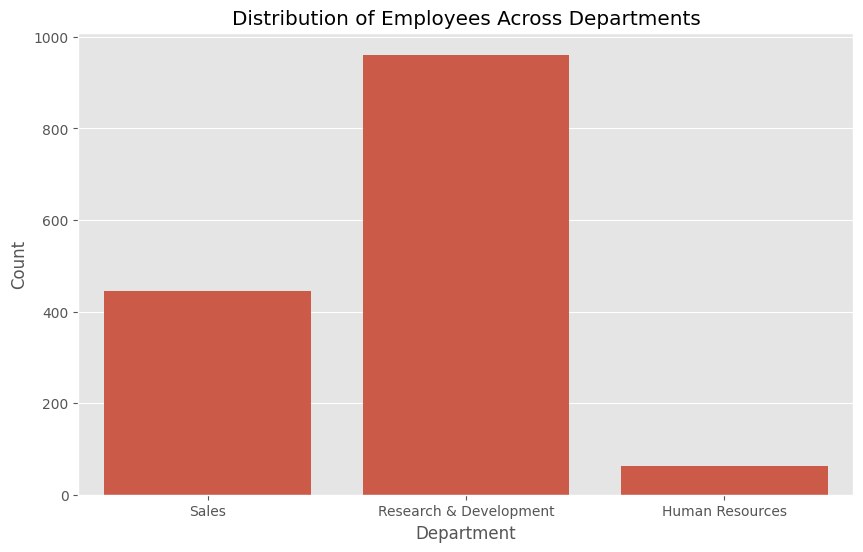

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Department')
plt.title('Distribution of Employees Across Departments')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

- Why Chosen: Bar charts are ideal for comparing counts across different categories. They are particularly effective in showing how frequently each category occurs, which is useful for categorical variables like Department.

- Explanation: The bar chart for the Department variable helps to visualize how employees are distributed across departments. This can highlight if certain departments have a higher concentration of employees, which might relate to attrition. This makes it easier to spot trends and potential areas of concern in the dataset.

#### 5. Boxplot for Monthly Rate Across Job Roles


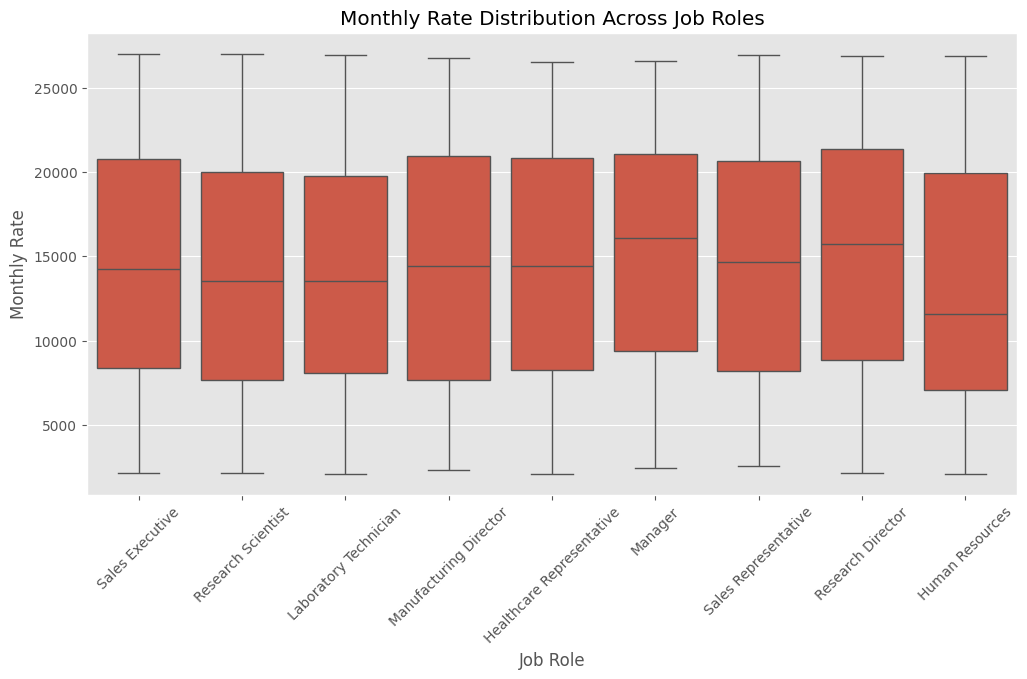

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='JobRole', y='MonthlyRate')
plt.xticks(rotation=45)
plt.title('Monthly Rate Distribution Across Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Monthly Rate')
plt.show()

- Why Chosen:The boxplot clearly illustrates the distribution of monthly salaries across various job roles, highlighting the median, quartiles, and range of values.

- Explanation: This visualization helps identify salary disparities between roles, which can be useful for analyzing potential correlations with employee attrition. Roles with lower median salaries, for example, might be more prone to higher attrition rates, suggesting that compensation may influence turnover.


These visualizations collectively help in exploring the relationships between key variables and the target outcome (attrition). By understanding these distributions and differences, we can gain insight into which variables might influence attrition and further tailor our analysis or model to focus on these factors.


# Data Preprocessing:


### Handling outliers:


Before we handle our outliers we did choose the IQR method Based on our dataset to identify how many outliers in our dataset.

In [53]:
import pandas as pd
data = pd.read_csv(('Dataset/Dataset_HR_Employee-Attrition.csv'))
import numpy as np
outlier_threshold = 3

def count_outliers(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data > upper_bound) | (column_data < lower_bound)
    return sum(outliers)

numeric_columns = data.select_dtypes(include=[np.number]).columns

outlier_counts = {}
total_rows_with_outliers = 0

for column in numeric_columns:
    outliers = count_outliers(data[column])
    outlier_counts[column] = outliers
    total_rows_with_outliers += outliers

total_rows = len(data)

print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} rows with outliers")

print(f"Total Rows with Outliers: {total_rows_with_outliers}")

Outlier Counts:
Age: 0 rows with outliers
DailyRate: 0 rows with outliers
DistanceFromHome: 0 rows with outliers
Education: 0 rows with outliers
EmployeeCount: 0 rows with outliers
EmployeeNumber: 0 rows with outliers
EnvironmentSatisfaction: 0 rows with outliers
HourlyRate: 0 rows with outliers
JobInvolvement: 0 rows with outliers
JobLevel: 0 rows with outliers
JobSatisfaction: 0 rows with outliers
MonthlyIncome: 0 rows with outliers
MonthlyRate: 0 rows with outliers
NumCompaniesWorked: 0 rows with outliers
PercentSalaryHike: 0 rows with outliers
PerformanceRating: 226 rows with outliers
RelationshipSatisfaction: 0 rows with outliers
StandardHours: 0 rows with outliers
StockOptionLevel: 0 rows with outliers
TotalWorkingYears: 0 rows with outliers
TrainingTimesLastYear: 0 rows with outliers
WorkLifeBalance: 0 rows with outliers
YearsAtCompany: 19 rows with outliers
YearsInCurrentRole: 0 rows with outliers
YearsSinceLastPromotion: 32 rows with outliers
YearsWithCurrManager: 0 rows with 

The analysis of our dataset revealed a total of **277 rows with outliers** across various attributes, including **226 rows** in **PerformanceRating**, **19 rows** in **YearsAtCompany**, and **32 rows** in **YearsSinceLastPromotion**. This significant presence of extreme values indicates that some data points deviate markedly from the majority. To address this issue, we will implement a strategy of capping the outliers, replacing them with the nearest non-outlier values. This approach allows us to retain the full dataset while mitigating the influence of these extreme values on our analyses, ensuring we maintain the integrity of the data without losing valuable information.

### handling outliers:

In [54]:
import numpy as np

outlier_threshold = 3

def count_outliers(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data > upper_bound) | (column_data < lower_bound)
    return sum(outliers)

numeric_columns = data.select_dtypes(include=[np.number]).columns

outlier_counts = {}
total_rows = len(data)

for column in numeric_columns:
    outliers = count_outliers(data[column])
    outlier_counts[column] = outliers

    # Cap outliers by setting them to the nearest non-outlier value
    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    data[column] = np.clip(data[column], lower_bound, upper_bound)

data.to_csv('Cleaned_dataset.csv', index=False)
    

### Checking the results by counting outliers after handling them.

In [55]:
import pandas as pd
import numpy as np

data1 = pd.read_csv('Cleaned_dataset.csv')
outlier_threshold = 3

def count_outliers(column_data1):
    q1 = np.percentile(column_data1, 25)
    q3 = np.percentile(column_data1, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data1 > upper_bound) | (column_data1 < lower_bound)
    return sum(outliers)

numeric_columns = data1.select_dtypes(include=[np.number]).columns

outlier_counts = {}
total_rows_with_outliers = 0

for column in numeric_columns:
    outliers = count_outliers(data1[column])
    outlier_counts[column] = outliers
    total_rows_with_outliers += outliers

total_rows = len(data1)

print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} rows with outliers")

print(f"Total Rows with Outliers: {total_rows_with_outliers}")

Outlier Counts:
Age: 0 rows with outliers
DailyRate: 0 rows with outliers
DistanceFromHome: 0 rows with outliers
Education: 0 rows with outliers
EmployeeCount: 0 rows with outliers
EmployeeNumber: 0 rows with outliers
EnvironmentSatisfaction: 0 rows with outliers
HourlyRate: 0 rows with outliers
JobInvolvement: 0 rows with outliers
JobLevel: 0 rows with outliers
JobSatisfaction: 0 rows with outliers
MonthlyIncome: 0 rows with outliers
MonthlyRate: 0 rows with outliers
NumCompaniesWorked: 0 rows with outliers
PercentSalaryHike: 0 rows with outliers
PerformanceRating: 0 rows with outliers
RelationshipSatisfaction: 0 rows with outliers
StandardHours: 0 rows with outliers
StockOptionLevel: 0 rows with outliers
TotalWorkingYears: 0 rows with outliers
TrainingTimesLastYear: 0 rows with outliers
WorkLifeBalance: 0 rows with outliers
YearsAtCompany: 0 rows with outliers
YearsInCurrentRole: 0 rows with outliers
YearsSinceLastPromotion: 0 rows with outliers
YearsWithCurrManager: 0 rows with outl

# Data Transmation:

### Encoding:

In [56]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

data1 = pd.read_csv('Cleaned_dataset.csv')
le = LabelEncoder()
categorical_columns = ['Attrition', 'OverTime', 'Gender']

for col in categorical_columns:
    data1[col] = le.fit_transform(data1[col])

print(data1)
data1.to_csv('encoding.csv', index=False)


      Age  Attrition     BusinessTravel  DailyRate              Department  \
0      41          1      Travel_Rarely       1102                   Sales   
1      49          0  Travel_Frequently        279  Research & Development   
2      37          1      Travel_Rarely       1373  Research & Development   
3      33          0  Travel_Frequently       1392  Research & Development   
4      27          0      Travel_Rarely        591  Research & Development   
...   ...        ...                ...        ...                     ...   
1465   36          0  Travel_Frequently        884  Research & Development   
1466   39          0      Travel_Rarely        613  Research & Development   
1467   27          0      Travel_Rarely        155  Research & Development   
1468   49          0  Travel_Frequently       1023                   Sales   
1469   34          0      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount

Here in the encoding method, we represent the categorical variables as follows:

- **Attrition**: (Attrition=1) indicates that the employee left the company, and (Attrition=0) signifies that the employee stayed.
- **OverTime**: (OverTime=1) indicates that the employee works overtime, and (OverTime=0) indicates that the employee does not work overtime.
- **Gender**: (Gender=1) indicates male, and (Gender=0) indicates female.

### Normaliztion:

In [57]:
import pandas as pd

data1 = pd.read_csv('encoding.csv')
data1 = pd.DataFrame(data1)

columns_to_normalize = ['DailyRate', 'DistanceFromHome', 'HourlyRate', 
                        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
                        'TotalWorkingYears', 'YearsAtCompany', 
                        'YearsInCurrentRole', 'YearsSinceLastPromotion', 
                        'YearsWithCurrManager']

# Decimal scaling normalization
for column in columns_to_normalize:
    max_abs_value = data1[column].abs().max()
    data1[column] = data1[column] / (10 ** len(str(int(max_abs_value))))

print("DataFrame after Decimal Scaling Normalization:")
print(data1)
data1.to_csv('normalization.csv', index=False)


DataFrame after Decimal Scaling Normalization:
      Age  Attrition     BusinessTravel  DailyRate              Department  \
0      41          1      Travel_Rarely     0.1102                   Sales   
1      49          0  Travel_Frequently     0.0279  Research & Development   
2      37          1      Travel_Rarely     0.1373  Research & Development   
3      33          0  Travel_Frequently     0.1392  Research & Development   
4      27          0      Travel_Rarely     0.0591  Research & Development   
...   ...        ...                ...        ...                     ...   
1465   36          0  Travel_Frequently     0.0884  Research & Development   
1466   39          0      Travel_Rarely     0.0613  Research & Development   
1467   27          0      Travel_Rarely     0.0155  Research & Development   
1468   49          0  Travel_Frequently     0.1023                   Sales   
1469   34          0      Travel_Rarely     0.0628  Research & Development   

      DistanceFr

Decimal scaling normalization was chosen because it effectively handles varying scales of numerical features by bringing them to a similar scale without distorting their relationships, thus minimizing the influence of large values.


### Discretization of MonthlyIncome into categories based on quantiles:


In [58]:
import pandas as pd
data1 = pd.read_csv('normalization.csv')
income_labels = ["Low Income", "Medium Income", "High Income"]
data1["MonthlyIncome"] = pd.qcut(data1["MonthlyIncome"], q=3, labels=income_labels)
print(data1)
data1.to_csv('after_discretization.csv', index=False)


      Age  Attrition     BusinessTravel  DailyRate              Department  \
0      41          1      Travel_Rarely     0.1102                   Sales   
1      49          0  Travel_Frequently     0.0279  Research & Development   
2      37          1      Travel_Rarely     0.1373  Research & Development   
3      33          0  Travel_Frequently     0.1392  Research & Development   
4      27          0      Travel_Rarely     0.0591  Research & Development   
...   ...        ...                ...        ...                     ...   
1465   36          0  Travel_Frequently     0.0884  Research & Development   
1466   39          0      Travel_Rarely     0.0613  Research & Development   
1467   27          0      Travel_Rarely     0.0155  Research & Development   
1468   49          0  Travel_Frequently     0.1023                   Sales   
1469   34          0      Travel_Rarely     0.0628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount

#### Explanation
Discretization is the process of converting continuous data, such as 'MonthlyIncome', into discrete categories for easier analysis. In this case, the 'MonthlyIncome' column is categorized into four salary levels: Low, Medium, High. This simplification helps in quickly assessing employee compensation and enhances the interpretability of the data by grouping continuous values into quantiles using the pd.qcut() function. By transforming continuous income data into discrete categories, we can better understand the distribution of salaries among employees and identify trends related to compensation and attrition.

# Chi-Squared tests and correlation analysis:

### 1. Chi-Squared Test

The Chi-Squared test helps in determining whether there's a significant association between two categorical variables.

In [59]:
import pandas as pd
from scipy.stats import chi2_contingency
df = pd.read_csv('after_discretization.csv')
contingency_table = pd.crosstab(df['Department'], df['Attrition'])
print("Contingency Table:")
print(contingency_table)
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)



Contingency Table:
Attrition                 0    1
Department                      
Human Resources          51   12
Research & Development  828  133
Sales                   354   92

Chi-Square Statistic: 10.79600732241067
Degrees of Freedom: 2
Expected Frequencies:
[[ 52.84285714  10.15714286]
 [806.06326531 154.93673469]
 [374.09387755  71.90612245]]


### 2. Correlation Coefficient
The correlation coefficient measures the strength and direction of the relationship between two numeric variables. You can analyze relationships such as between Age and MonthlyIncome.

In [60]:
import pandas as pd
import numpy as np
df = pd.read_csv('after_discretization.csv')
column1 = 'Age'
column2 = 'YearsAtCompany'
data_column1 = df[column1]
data_column2 = df[column2]
correlation_coefficient = np.corrcoef(data_column1, data_column2)[0, 1]

print(f"Correlation coefficient between {column1} and {column2}: {correlation_coefficient}")


Correlation coefficient between Age and YearsAtCompany: 0.3032170483868525


##### - Chi-Squared Test - Summary of Outputs

Contingency Table: Shows the frequency distribution of Department and Attrition, indicating how many employees in each department either stayed or left.

- Chi-Square Statistic: Measures the difference between observed and expected frequencies, with a higher value indicating a stronger association.

- Degrees of Freedom: Helps determine the significance of the chi-square statistic.

- Expected Frequencies: Displays the expected counts in each cell if there were no relationship between the variables.

- P-value: Indicates the probability of observing the data under the null hypothesis. A low p-value (typically < 0.05) suggests a significant association between the two variables.

##### Why You Did the Chi-Squared Test:
To examine the relationship between Department and Attrition, helping identify which departments might have higher turnover rates.

##### - Correlation Coefficient - Summary of Outputs

Correlation Coefficient Value: Measures the strength and direction of the relationship between two variables (e.g., Age and MonthlyIncome). A value of approximately 0.3 indicates a moderate positive correlation.

##### Why You Calculated the Correlation Coefficient:
To understand the relationship between Age and MonthlyIncome, which can impact employee satisfaction and retention strategies.

Conclusion
Both analyses provide insights into factors influencing employee attrition, aiding in the development of effective retention strategies.

# Removing Highly Correlated Attributes
In this step, we will identify and remove attributes (columns) from our dataset that have an absolute correlation of 0.75 or higher. 

In [61]:
data = pd.read_csv('after_discretization.csv')
df = pd.DataFrame(data)

correlation_matrix = df.corr(numeric_only=True)
correlation_threshold = 0.75
highly_correlated_pairs = np.where(np.abs(correlation_matrix) >= correlation_threshold)
numeric_attributes = list(df.select_dtypes(include='number'))
attributes_to_remove = set()

for i, j in zip(*highly_correlated_pairs):
    if i != j and numeric_attributes[i] not in attributes_to_remove and numeric_attributes[j] not in attributes_to_remove:
        attribute_i = numeric_attributes[i]
        attribute_j = numeric_attributes[j]
        attributes_to_remove.add(attribute_j) 
df_filtered = df.drop(columns=attributes_to_remove)
df_filtered.to_csv('Preprocessed_dataset.csv', index=False)

print("\nOriginal DataFrame:")
print(df)

print("\nDataFrame after removing highly correlated attributes:")
print(df_filtered)



Original DataFrame:
      Age  Attrition     BusinessTravel  DailyRate              Department  \
0      41          1      Travel_Rarely     0.1102                   Sales   
1      49          0  Travel_Frequently     0.0279  Research & Development   
2      37          1      Travel_Rarely     0.1373  Research & Development   
3      33          0  Travel_Frequently     0.1392  Research & Development   
4      27          0      Travel_Rarely     0.0591  Research & Development   
...   ...        ...                ...        ...                     ...   
1465   36          0  Travel_Frequently     0.0884  Research & Development   
1466   39          0      Travel_Rarely     0.0613  Research & Development   
1467   27          0      Travel_Rarely     0.0155  Research & Development   
1468   49          0  Travel_Frequently     0.1023                   Sales   
1469   34          0      Travel_Rarely     0.0628  Research & Development   

      DistanceFromHome  Education Educatio

## Explanation :
- Why We Did This Step
We removed highly correlated attributes (with an absolute correlation of 0.75 or higher) to:

Prevent Multicollinearity: High correlations can distort statistical analysis and affect model performance.

Enhance Interpretability: Fewer features make the model easier to understand.

Improve Performance: Reducing redundancy can lead to better generalization on unseen data.

- Explanation of the Outputs
Original DataFrame: Initially had 1470 rows and 35 columns.
After Removal: The number of columns decreased to 32 after eliminating five highly correlated columns, ensuring the dataset contains only the most informative features for analysis.

# Feature Selection 
### Explanation:
Feature selection is a crucial step in preparing data for machine learning models. It helps in identifying the most relevant features that contribute to the prediction of the target variable. This can improve model performance, reduce overfitting, and shorten training times.

For our dataset, we'll apply a filter method to select features based on correlation, as it provides a straightforward way to assess feature relevance. We will look for features that are significantly correlated with the target variable, Attrition.


In [62]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
df = pd.read_csv('Dataset/Dataset_HR_Employee-Attrition.csv')
le = LabelEncoder()
X = df.drop(columns=['Attrition'])
y = df['Attrition'] 
X = X.loc[:, (X != X.iloc[0]).any()] 
X = X.select_dtypes(include=['int64', 'float64'])
selector = SelectKBest(score_func=f_classif, k=5) 
X_new = selector.fit_transform(X, y)

# Display the selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['Age', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears',
       'YearsInCurrentRole'],
      dtype='object')


### Explanation:

### Selected Features:
The selected features related to employee attrition are:
- **JobLevel**
- **TotalWorkingYears**
- **YearsInCurrentRole**
- **Age**
- **MonthlyIncome**

These features are statistically significant predictors of attrition.

### Why This Method is Suitable:
1. **Efficiency**: The Filter Method is computationally efficient, quickly evaluating features independently.
2. **Statistical Relevance**: It selects features based on their significance to the target variable (Attrition), ensuring relevance.
3. **Dimensionality Reduction**: Reducing the number of features can improve model performance and reduce overfitting.
4. **Interpretability**: The selected features provide clear insights into factors affecting employee attrition, aiding in strategy development.

### Why We Chose the Same Dataset:
We chose to use the same dataset because the selected features from the original dataset demonstrated strong predictive value. Re-using the same dataset ensures consistency in analysis and enables more reliable comparisons across different models, leading to more accurate and actionable insights.

### Why We Didn’t Remove Features:
We did not remove the selected features because they have strong predictive value and significantly enhance the model's performance. Removing them would risk losing critical information, reducing the accuracy of predictions. Retaining these features ensures the model focuses on the most impactful factors, improving both accuracy and interpretability.

# Dataset After  Preprocessing

In [63]:
data1 = pd.read_csv('Preprocessed_dataset.csv')
print(data1)

      Age  Attrition     BusinessTravel  DailyRate              Department  \
0      41          1      Travel_Rarely     0.1102                   Sales   
1      49          0  Travel_Frequently     0.0279  Research & Development   
2      37          1      Travel_Rarely     0.1373  Research & Development   
3      33          0  Travel_Frequently     0.1392  Research & Development   
4      27          0      Travel_Rarely     0.0591  Research & Development   
...   ...        ...                ...        ...                     ...   
1465   36          0  Travel_Frequently     0.0884  Research & Development   
1466   39          0      Travel_Rarely     0.0613  Research & Development   
1467   27          0      Travel_Rarely     0.0155  Research & Development   
1468   49          0  Travel_Frequently     0.1023                   Sales   
1469   34          0      Travel_Rarely     0.0628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount